In [1]:
# DATASCIENCE!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# main imports
import cv2
import pytesseract as ts
import re

# utils
import imutils
import os
from glob import glob
from tqdm import tqdm

In [2]:
imge = cv2.imread('/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/tesseract/Receipts/1007-receipt.jpg')

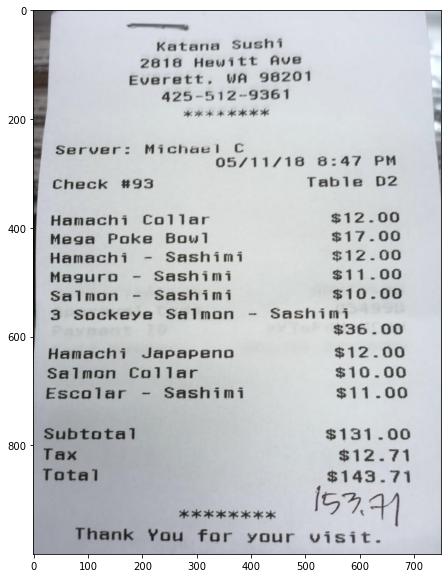

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(imge)
plt.show()

In [4]:
print(ts.image_to_string(imge))

ee

Katana Sushi
28616 Hewitt Ave
Everett, WA 96201
425-512-9361
HHA AKA AK

Server: Michael C
05/11/16 6:47 PH

Check #93 Table D2
Hamachi Collar $12.00
Mega Poke Bowl $17.00
Hamachi - Sashimi $12.00
Maguro - Sashimi $11.00
Salmon - Sashimi $10.00
3 Sockeye Salmon - Sashimi
$36.00
Hamachi Japapeno $12.00
Salmon Collar $10.00
Escolar - Sashimi $11.00
Subtotal $131.00
Tax nee Til
Total $143.71

2K 2K KK 15%, “iE

Thank You for your visit.



In [5]:
print(ts.image_to_osd(imge))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 12.15
Script: Latin
Script confidence: 1.67



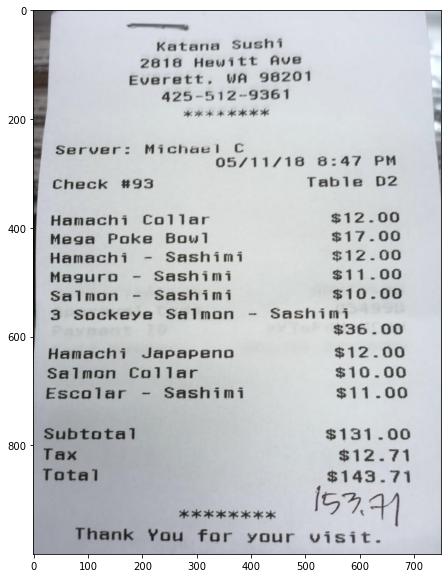

In [6]:
#converting image into gray scale image
gray_image = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding
threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.figure(figsize=(10,10))
plt.imshow(imge)
plt.show()

In [7]:
#configuring parameters for tesseract
custom_config = r'--oem 3 --psm 6'

details = ts.image_to_data(threshold_img, output_type=ts.Output.DICT, config=custom_config,lang='eng')
print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [8]:
print(ts.image_to_string(threshold_img))

a
Katana Sushi
28168 Hewitt Ave
Everett. WA 96201
425-512-9361
eA OOK

Server: Micheel C
05/11/18 8:47 PM

Check #93 Table 02
Hamachi Collar $12.00
Mega Poke Bow! $17.00
Hamachi - Sashimi $12.00
Maguro - Sashimi $11.00
Salman - Sashimi $10.00
3 Sockeye Salmon - Sashimi
$36.00
Hamachi Japapeno $12.00
Salmon Collar $10.00
Escolar - Sashimi $11.00
Subtotal $131.00
Tax $12.71
Total $143.71

FR EK KOK 5624

Thank You for your visit.



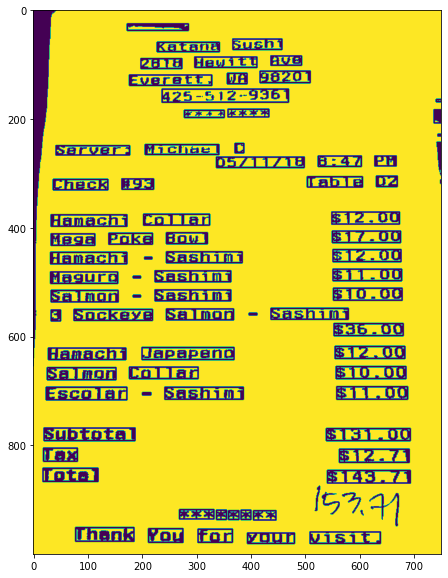

In [9]:
total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
    if int(details['conf'][sequence_number]) >10:
        (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
        image = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(threshold_img)
plt.show()

In [10]:
%run -i 'text_seperate.py'
text_sep = text_seperate(details)
text_sep

[['—'],
 ['Katana', 'Sushi'],
 ['2616', 'Hewitt', 'Ave'],
 ['Everett.', 'wa', '96201'],
 ['425-512-9361', '.'],
 ['eA', 'OOK', 'f'],
 ['Server:', 'Micheel', 'C', ','],
 ['05/11/18', '8:47', 'PM'],
 ['Check', '#93', 'Table', '02', "'"],
 ['Hamachi', 'Collar', '$12.00'],
 ['Mega', 'Poke', 'Bow!', '$17.00'],
 ['Hamachi', '-', 'Sashimi', '$12.00'],
 ['Maguro', '-', 'Sashimi', '$11.00'],
 ['Salman', '-', 'Sashimi', '$10.00'],
 ['3', 'Sockeye', 'Salmon', '-', 'Sashimi'],
 ['$36.00'],
 ['Hamachi', 'Japapeno', '$12.00'],
 ['Salmon', 'Collar', '$10.00'],
 ['Escolar', '-', 'Sashimi', '$11.00'],
 ['Subtotal', '$131.00'],
 ['Tax', '$12.71'],
 ['Total', '$143.71'],
 ['FRR', 'Ok', '6', '2K', 'KK', '5624'],
 ['Thank', 'You', 'for', 'your', 'visit.']]

In [11]:
import csv

with open('/home/jayanthikishore/Downloads/result_text.txt',  'w', newline="") as file:
    csv.writer(file, delimiter=" ").writerows(text_sep)

In [19]:
# Picking the Total value from the receipt


for i in range(len(text_sep)):
    s1 = text_sep[i]
    s2 = ' '.join([str(x) for x in s1])
    s22 = s2.split(' ')[0]
    if(s22 == 'Total') or (s22 == 'TOTAL'):
        print(s2)

Total $143.71
